In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import os

In [2]:
# Load in the daily measured heights of the wells in a dataframe and manage dates
df_heights = pd.read_csv('data/well_heights.csv')
df_heights['date'] = pd.to_datetime(df_heights['date'], format='%d-%m-%Y')
df_heights = df_heights.set_index('date')

In [3]:
def make_plot(date):

    # Transform datetime into time format for loading in the logger data
    string_date = datetime.strftime(date, '%Y%m%d')

    # Load in the well heights
    heights = df_heights.loc[date].values

    # Define the paths for each CSV
    file_paths = [
    f'data/{string_date}/logger_01.csv',
    f'data/{string_date}/logger_02.csv',
    f'data/{string_date}/logger_03.csv'
    ]

    # Initialize dfs with None to ensure it always has three elements
    dfs = [None, None, None]  # Pre-fill with None for all loggers

    # Load the CSVs and handle errors
    for i, file_path in enumerate(file_paths):
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path, skiprows=1)
                df.columns = df.columns.str.strip()
                df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%m-%y %H:%M:%S', dayfirst=True)
                df.set_index('datetime', inplace=True)
                dfs[i] = df  # Assign DataFrame to the corresponding index
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
        else:
            print(f"File {file_path} does not exist, skipping...")

    for i in range(3):
        if dfs[i] is None:
            continue  # Skip to the next iteration if the DataFrame is None

        # Make a new variable that contains the height of the well in meters
        height = float(heights[i])/100

        # Create a string for the date
        date_string = datetime.strftime(date, format='%d-%m-%Y')

        # To the measurements, add the height of the well and subtract the length of the rod
        dfs[i]['Meters'] += -1.9 + height

        # Plot the graph
        plt.figure()

        plt.axhline(y=-1.9+height, color='red', linestyle='--', label='Depth of the sensor')
        plt.axhline(y=0, color='sandybrown', linestyle='--', label='Level of the beach')
        plt.plot(dfs[i].index, dfs[i]['Meters'], label='Measured groundwater level')

        plt.title(f'Depth of groundwater table over time on {date_string} - Logger {i+1}')
        plt.legend()
        plt.ylim(-2, 0.2)
        plt.xlabel('Time')
        plt.ylabel('Depth (m)')
        plt.tight_layout()
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

        plt.savefig(f'plots/{string_date}_logger-0{i+1}.jpg')

    return None
    

In [4]:
# Define the start and end date of the measurement period
start_date = '20240927'
end_date = '20241018'

# Put them into datetime format
start_date = datetime.strptime(start_date, '%Y%m%d')
end_date = datetime.strptime(end_date, '%Y%m%d')

File data/20240927/logger_03.csv does not exist, skipping...
File data/20240930/logger_03.csv does not exist, skipping...
File data/20241001/logger_03.csv does not exist, skipping...


C:\Users\lucne\AppData\Local\Temp\ipykernel_29068\3344126077.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


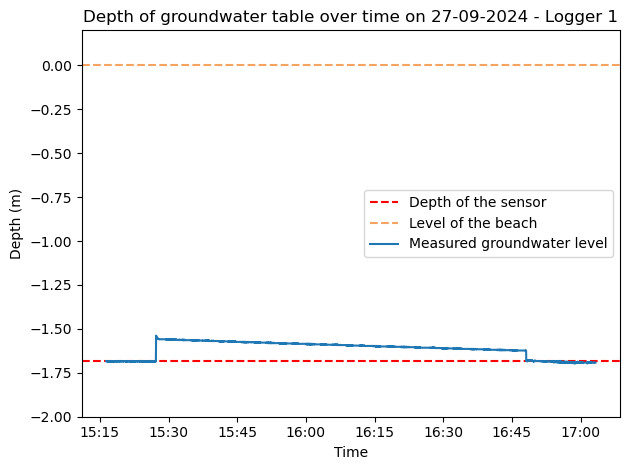

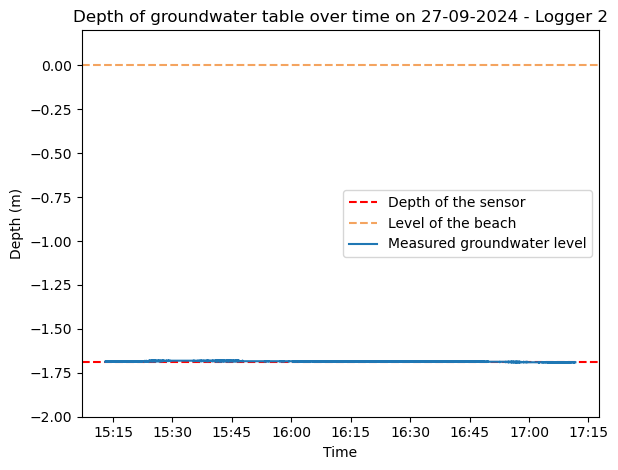

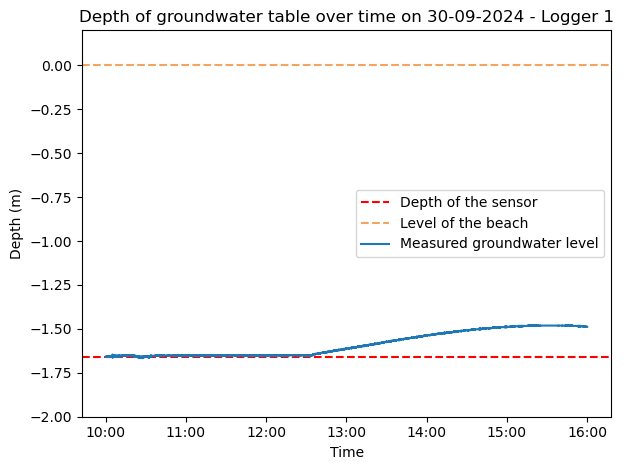

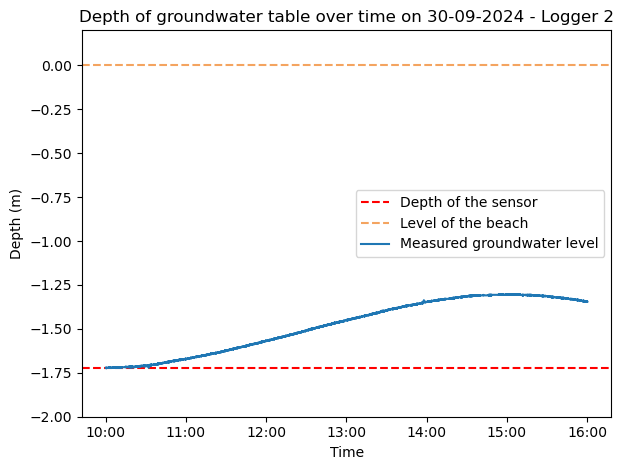

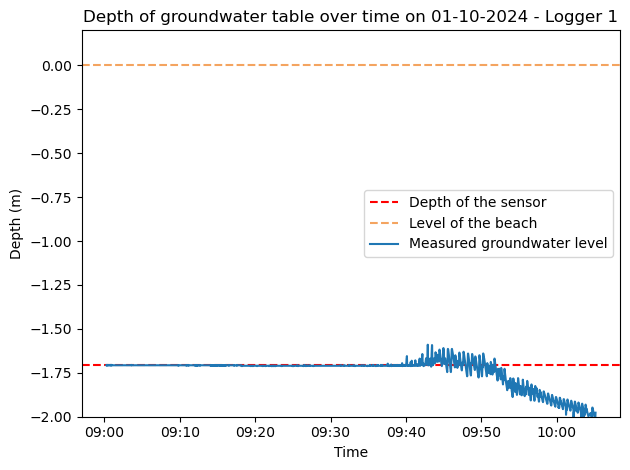

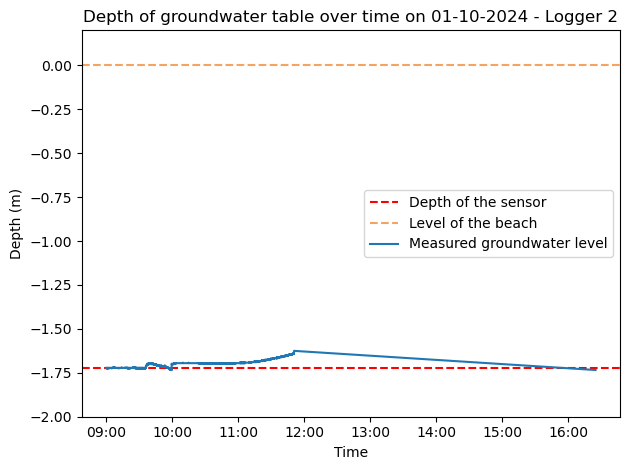

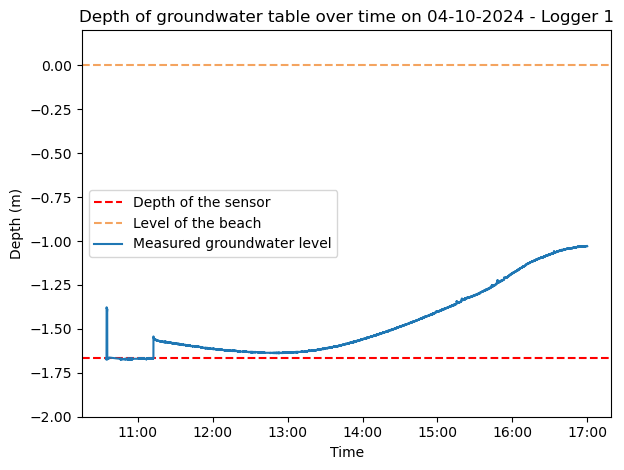

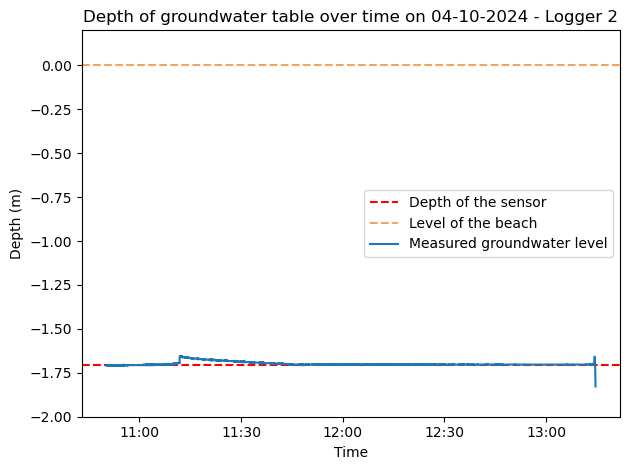

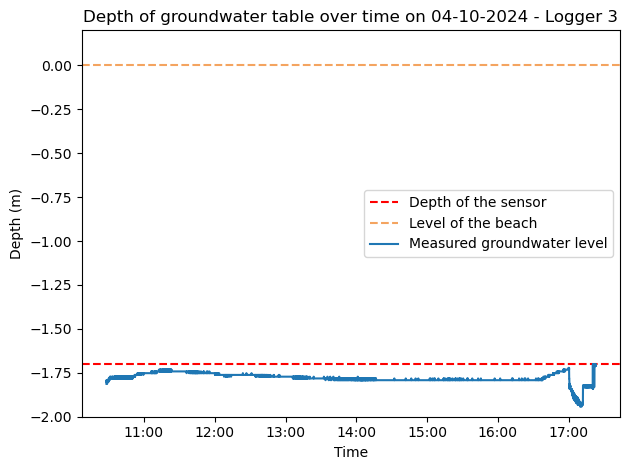

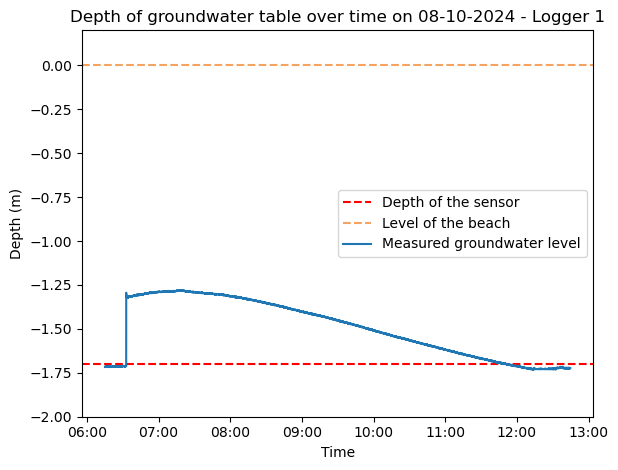

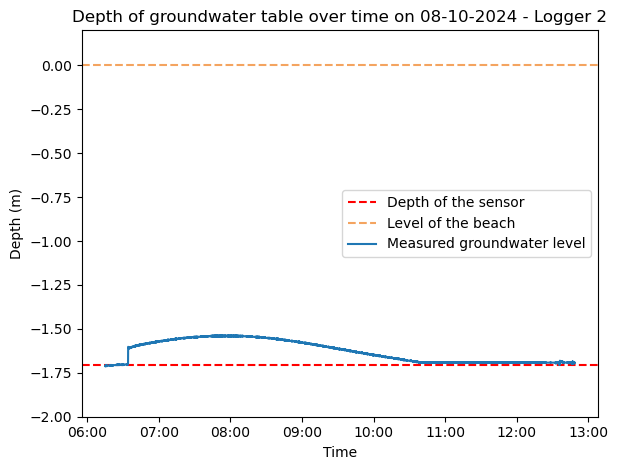

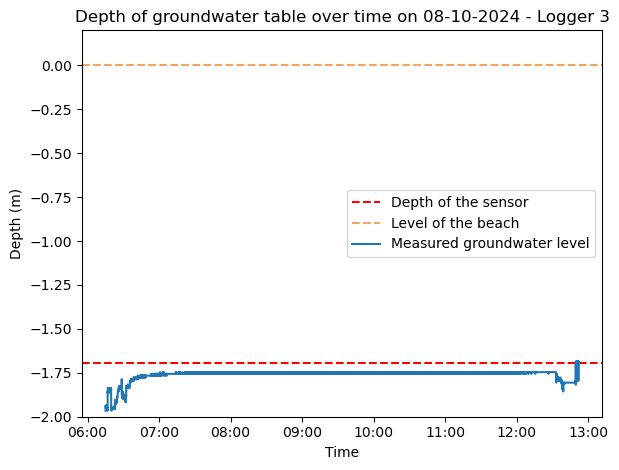

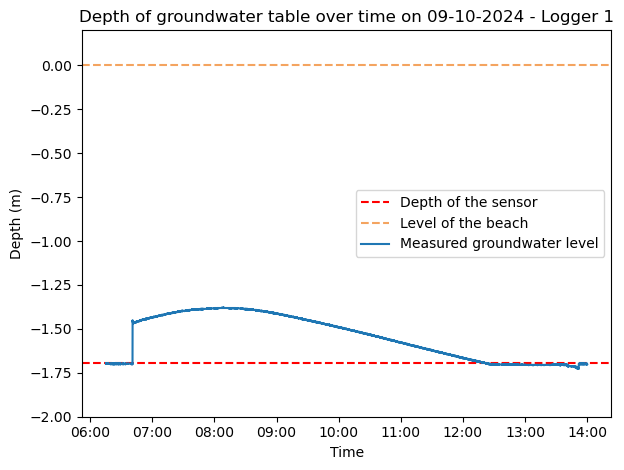

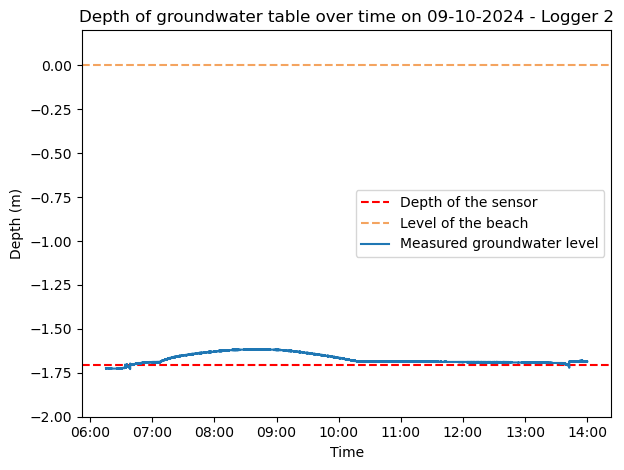

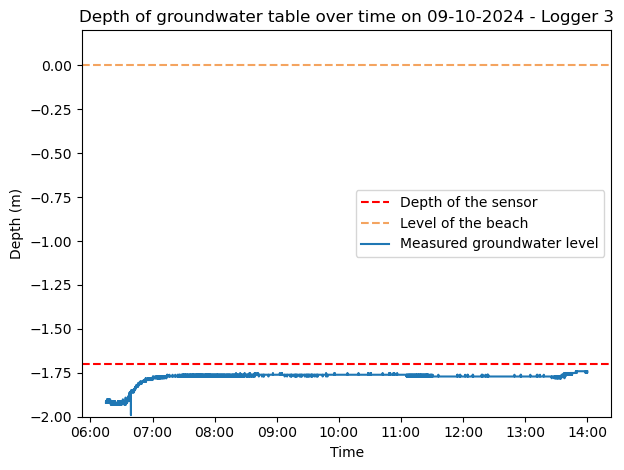

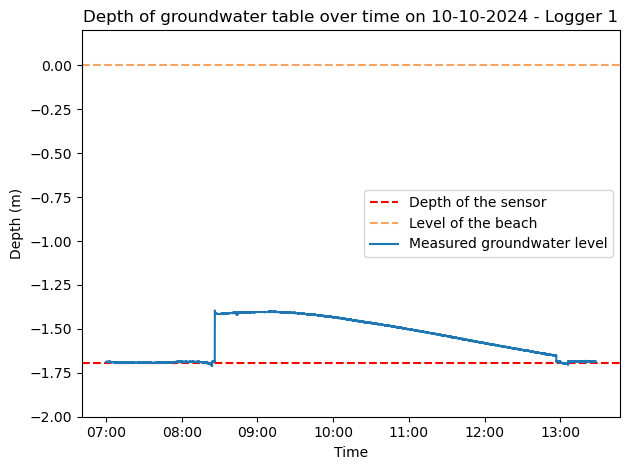

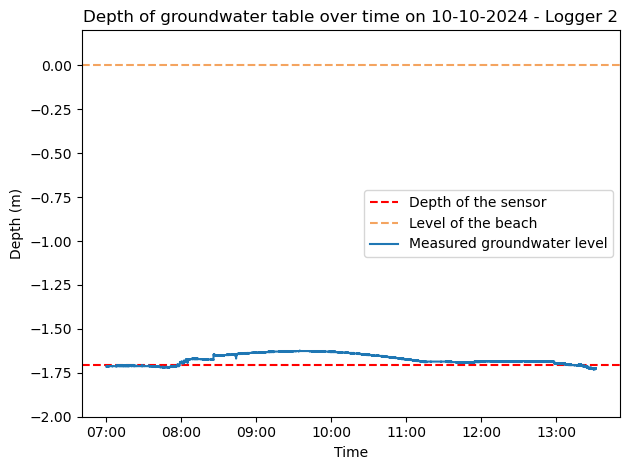

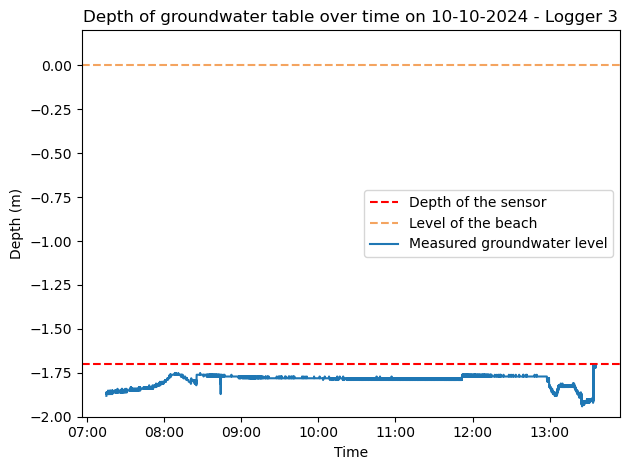

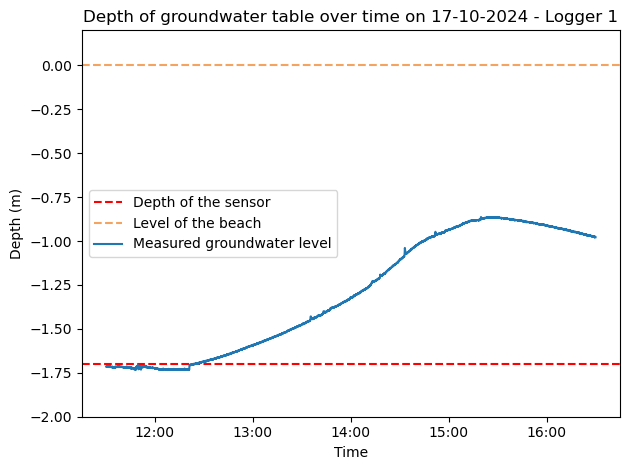

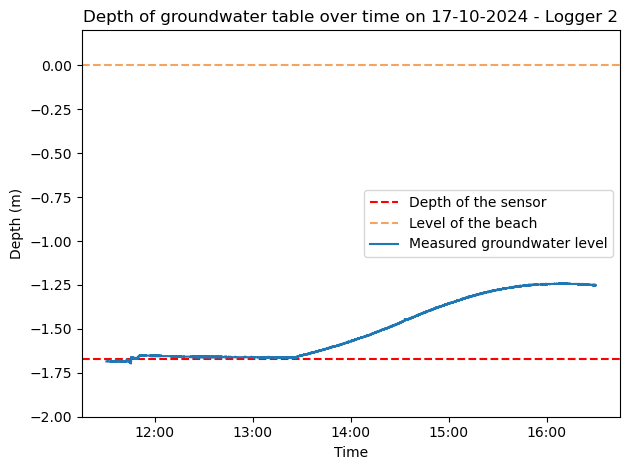

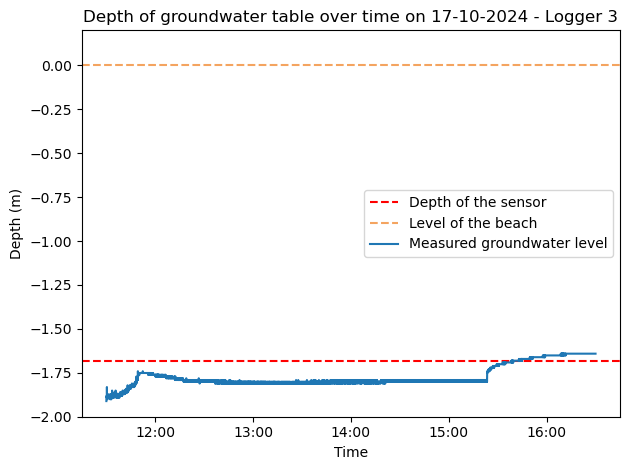

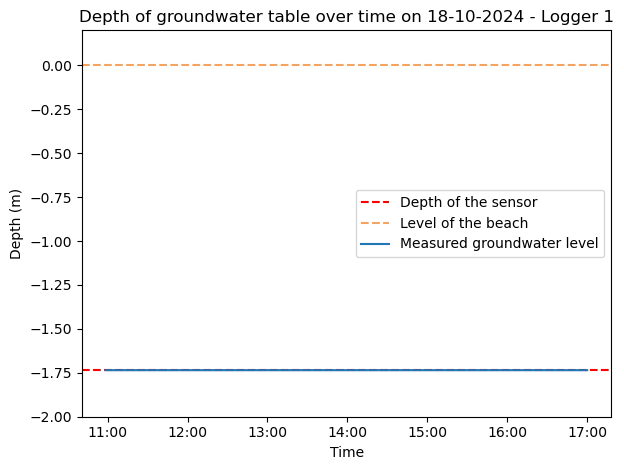

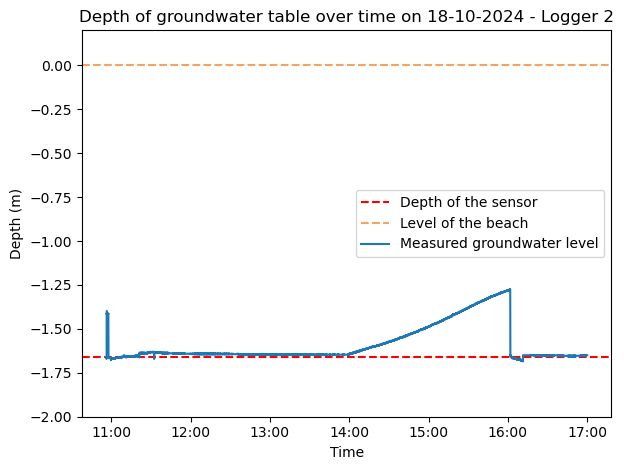

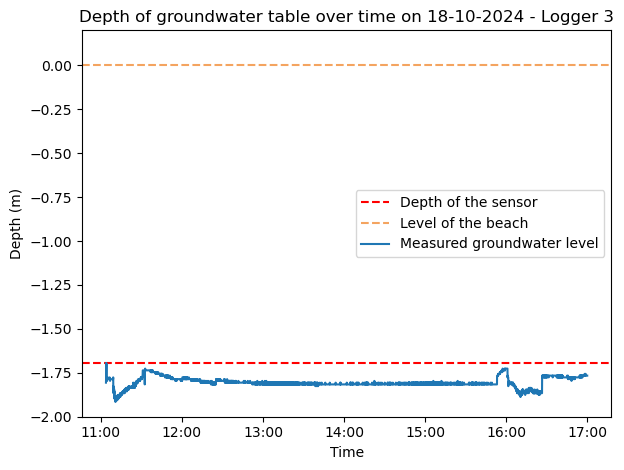

In [5]:
# Loop over the measurement dates and make plots
date = start_date

while date <= end_date:
    if date not in df_heights.index:
        date += timedelta(days=1)
        continue
    
    make_plot(date)
    date += timedelta(days=1)